In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sympy
from sympy.solvers import solve
from scipy import stats


np.set_printoptions(suppress=True)

In [30]:
clr_launch = {"Flight Number":[x for x in range(1,25)],
              "Date":['1981-04-12', '1981-11-12', '1982-02-22', '1982-06-27', '1982-11-11', '1983-04-04',
                     '1983-06-18', '1983-08-30', '1983-11-28', '1984-02-03', '1984-04-06', '1984-08-30',
                     '1984-10-05', '1984-11-08', '1985-01-24', '1985-04-12', '1985-04-29', '1985-06-17',
                     '1985-07-29', '1985-08-27', '1985-10-03', '1985-10-30', '1985-11-26', '1986-01-12'],
             "Ambient Temperature":[66,70,69,80,68,67,72,73,70,57,63,70,78,67,53,67,75,70,81,76,79,75,76,58],
             "Successful Launch":[1,0,1,float("nan"), 1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,0]}
clr_launch = pd.DataFrame(clr_launch).dropna()
clr_launch['Date'] = pd.to_datetime(clr_launch['Date'])
clr_launch = clr_launch.set_index('Flight Number')

In [31]:
clr_launch

,Ambient Temperature,Date,Successful Launch
Flight Number,,,
1,66,1981-04-12,1.0
2,70,1981-11-12,0.0
3,69,1982-02-22,1.0
5,68,1982-11-11,1.0
6,67,1983-04-04,1.0
7,72,1983-06-18,1.0
8,73,1983-08-30,1.0
9,70,1983-11-28,1.0
10,57,1984-02-03,0.0


## 2. Graphs to display the link between Ambient Temperature and Launch Success

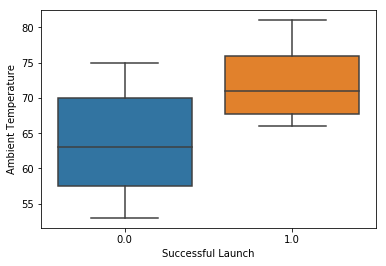

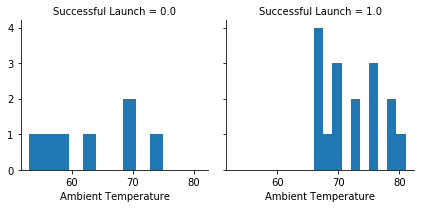

In [32]:
sns.boxplot(data=clr_launch, x="Successful Launch", y="Ambient Temperature")
plt.show()

suc_facet = sns.FacetGrid(data=clr_launch, col="Successful Launch")
suc_facet = suc_facet.map(plt.hist, "Ambient Temperature")
plt.show()

## 3. Scatterplot with regression line & Linear Regression Equation

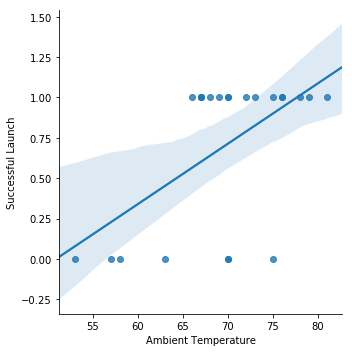

In [33]:
sns.lmplot(data=clr_launch, x="Ambient Temperature", y="Successful Launch")
plt.show()

In [34]:
X = clr_launch['Ambient Temperature'].values
X = sm.add_constant(X)

model = sm.OLS(clr_launch['Successful Launch'], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Successful Launch   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     9.630
Date:                Wed, 25 Apr 2018   Prob (F-statistic):            0.00538
Time:                        15:05:10   Log-Likelihood:                -10.441
No. Observations:                  23   AIC:                             24.88
Df Residuals:                      21   BIC:                             27.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9048      0.842     -2.262      0.034      -3.656      -0.154
x1             0.0374      0.012      3.103      0.005       0.012       0.062
==============================================================================
Omnibus:                        4.037   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.150
Skew:                          -0.903   Prob(JB):                        0.207
Kurtosis:                       2.836   Cond. No.                         708.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
preds = model.predict([[1,60], [1,85]])
coef = round(model.params[1],6)
const = round(model.params[0], 6)

print('EQUATION: yhat = '+str(coef)+' * X'+str(const))
print()
print("Statsmodels predicted values : \n"+"yhat 60 = "+str(preds[0])+"\n"+"yhat 85 = "+str(preds[1]))

EQUATION: yhat = 0.037381 * X-1.904762

Statsmodels predicted values : 
yhat 60 = 0.338095238095
yhat 85 = 1.27261904762


## 4. Solve Equation 7.5

Linear function $$y=b_0 + b_1(x)$$

Sigmoid function $$ p = \frac{1}{1+e^{-y}}$$

Combine the 2 previous calculations so that we're solving for y ...

$$ln\biggl(\frac{\pi_i}{1 - \pi_i}\biggl) = \beta_ 0 + \beta_ 1x_i$$

And then calculas again to have it solve for probability ...

$$\pi_i = \frac{e^{\beta_0 + \beta_1x_i}}{1 + e^{\beta_0 + \beta_1x_i}}$$

bam.

## 5. Use equation 7.6 to create 6 graphs ...

In [36]:
def equation(scores):
    sig = np.exp(scores) / (1 + np.exp(scores))
    
    return sig

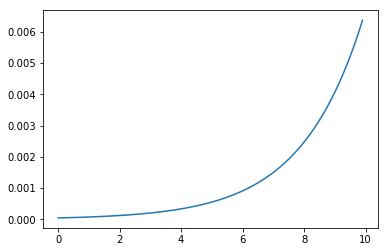

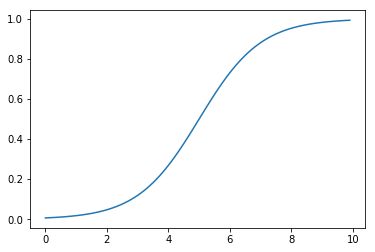

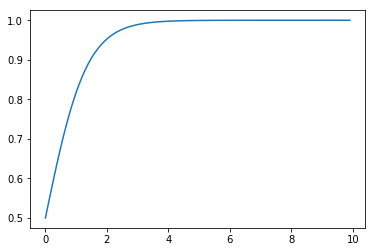

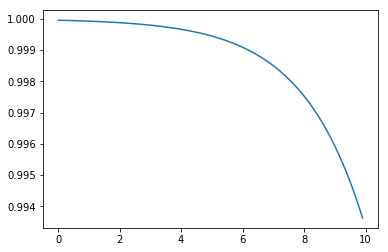

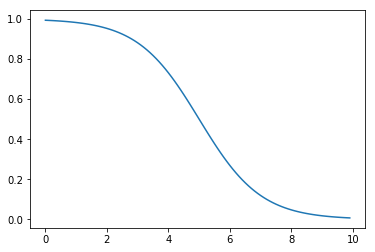

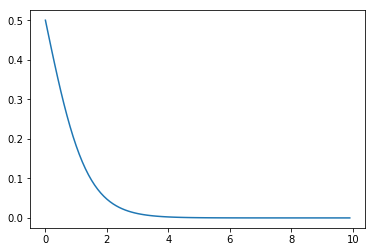

In [37]:
xvals = np.arange(0,10, .1)
bvals = np.array([[-10, 0.5], [-5, 1], [0, 1.5], [10, -0.5], [5, -1], [0, -1.5]])

for b in bvals:
    plt.plot(xvals, [equation(b[0] + b[1]*n) for n in xvals])
    plt.show()
    
# beta1's which give the highest level of weight to our x values innevitably create the steepest slopes.

## 6. compare probabilities from logistic to linear

In [38]:
lm_predicts = model.predict()

X = clr_launch['Ambient Temperature'].values
X = sm.add_constant(X)

logmodel = sm.Logit(endog=clr_launch['Successful Launch'], exog=X).fit()
logmodel_predict = logmodel.predict()

# 3 misclassifications between linear and actual
print()
print("SS for logistic model:")
print(sum(abs(logmodel_predict - clr_launch['Successful Launch'])))
print("MLE Hessian values for logistic model:")
print(logmodel.mle_retvals['Hessian'])
# 3 misclassifications between linear and actual
print()
print("SS for linear model:")
print(sum(abs(lm_predicts - clr_launch['Successful Launch'])))

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7

SS for logistic model:
6.44885930421
MLE Hessian values for logistic model:
[[  -0.14185851   -9.64343583]
 [  -9.64343583 -659.2648879 ]]

SS for linear model:
7.0419047619


## 7. Predict likelihood of o-ring failure given the logistic regression equation ...

In [39]:
def oring_log(x):
    return np.exp(-15.043+0.232*x) / (1 + np.exp(-15.043 + 0.232*x))

In [40]:
for t in [31, 50, 75]:
    print('Probability of no O-ring failure at '+str(t)+" Farenheit:")
    print(round(oring_log(t),6))
    print()

Probability of no O-ring failure at 31 Farenheit:
0.000389

Probability of no O-ring failure at 50 Farenheit:
0.030978

Probability of no O-ring failure at 75 Farenheit:
0.913489



## 8. Predict at 60 and 70 ... 

In [50]:
p_vals = [[1,60], [1,70]]
lg_pred = logmodel.predict(p_vals)

lg_odds60 = lg_pred[0]/(1-lg_pred[0])
lg_odds70 = lg_pred[1]/(1-lg_pred[1])

print("Odds of no damage at 60: "+ str(lg_odds60))
print("Odds of no damage at 70: "+ str(lg_odds70))

Odds of no damage at 60: 0.328526756255
Odds of no damage at 70: 3.34842621069


## 9. increments between 60 & 70

In [52]:
odds_diff = lg_odds70 / lg_odds60
print("We would expect the odds to change by "+str(odds_rat)+' between 60 and 70 degrees')

We would expect the odds to change by 10.1922481105 between 60 and 70 degrees


## 10. explain odds diff from 52 to 51 relative to 60 to 59

In [58]:
odds60 = logmodel.predict([1,60])/ (1 - logmodel.predict([1,60]))
odds59 = logmodel.predict([1,59])/ (1 - logmodel.predict([1,59]))
odds52 = logmodel.predict([1,60])/ (1 - logmodel.predict([1,52]))
odds51 = logmodel.predict([1,59])/ (1 - logmodel.predict([1,51]))


print("Difference in probs between 60 and 59: ", *odds60-odds59)
print("Difference in probs between 51 and 52: ", *odds52-odds51)

Difference in probs between 60 and 59:  0.0680651305533
Difference in probs between 51 and 52:  0.0449264878582


51-52 is along the base of the S-curve (or sigmoid) still and as such, differences in probabilties are being minimized since 51 and 52 farenheit are both likely to be classed as a failed launch. As the temperature increases, that certainty diminishes and probabilities rise quicker through the 50% certainty mark until hitting the mirror state of the S curve where certainty becomes more established and larger increases in temperature are required to increase probability.

## 11. Plot 2 logistic regressions using OLS and ML

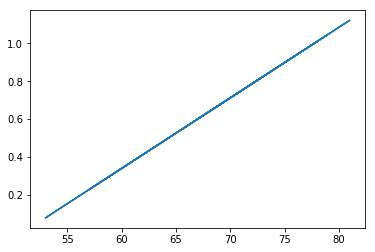

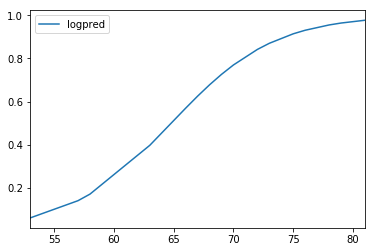

In [18]:
plt.plot(clr_launch['Ambient Temperature'], model.predict())
plt.show()

logdf = pd.DataFrame(logmodel.predict().tolist(), clr_launch['Ambient Temperature'].tolist())
logdf.columns = ['logpred']
logdf.sort_values('logpred').plot()
plt.show()

## 12. Odds ratio and confidence interval

In [131]:
odds_60 = logmodel.predict([1,60]) / (1 - logmodel.predict([1,60]))
odds_31 = logmodel.predict([1,31]) / (1 - logmodel.predict([1,31]))
odds_60/odds_31
print("Odds Ratio is: "+str(*odds_rat60/odds_31))

se = logmodel.summary2().tables[1]['Std.Err.'].loc['x1']
b1 = logmodel.summary2().tables[1]['Coef.'].loc['x1']

lower = np.exp(b1-1.96*se)
upper = np.exp(b1+1.96*se)

new_lower=lower**29
new_upper=upper**29

print("Confidence interval for 31-60 is: "+str((round(new_lower,6), round(new_upper))))

Odds Ratio is: 839.427055507
Confidence interval for 31-60 is: (1.787031, 394306.0)


## 13. Reverse 0 and 1 and answer some questions ...

In [132]:
clr_launch_r = clr_launch.copy()
clr_launch_r['Successful Launch'] = clr_launch_r['Successful Launch'].apply(lambda x: abs(x-1))

X = clr_launch_r['Ambient Temperature'].values
X = sm.add_constant(X)

logmodel_r = sm.Logit(clr_launch_r['Successful Launch'], X).fit()

logmodel_r.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Successful Launch   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                  0.2813
Time:                        16:11:00   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
                                        LLR p-value:                  0.004804
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0429      7.379      2.039      0.041       0.581      29.505
x1            -0.2322      0.108     -2.145      0.032      -0.444      -0.020
==============================================================================
"""

#### a. The models are mirror reflections of one another ... obviously because this is an S curve. Log- likelihood, pvals and constant / coef are all the same absolute values as the original model.

#### b. The regression coeeficients have mirrored where the constant is now positive while the coef is negative. Our temperature is multiplied by -0.2322 then has 15.0429 added to it before being thrown into a sigmoid and compressed between 0 and 1.

#### c. odds ratio's are the inverse of one another (ie. 1/1.2613...) so again ... a literal mirror reflection

In [133]:
orig_oddr = np.exp(logmodel.params[1])
new_oddr = np.exp(logmodel_r.params[1])

print("Odds ratio for original: "+str(orig_oddr)+str(' (^-1 for inverse ..)'))
print("Odds ratio for reversed successes: "+str(new_oddr))

Odds ratio for original: 1.26132498547 (^-1 for inverse ..)
Odds ratio for reversed successes: 0.79281708641


#### d. new Wald test, results are unchanged

In [152]:
se = logmodel_r.summary2().tables[1]['Std.Err.'].loc['x1']
b1 = logmodel_r.summary2().tables[1]['Coef.'].loc['x1']

lower = np.exp(b1-1.96*se)
upper = np.exp(b1+1.96*se)

print("Confidence interval for 31-60 of our reversed model is: "+str((lower, upper)))

Confidence interval for 31-60 of our reversed model is: (0.6412689529663077, 0.98017989112949266)


In [23]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Successful Launch   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Apr 2018   Pseudo R-squ.:                  0.2813
Time:                        09:33:12   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
                                        LLR p-value:                  0.004804
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.0429      7.379     -2.039      0.041     -29.505      -0.581
x1             0.2322      0.108      2.145      0.032       0.020       0.444
==============================================================================
"""

## 14. LRT for space shuttle data

In [161]:
lrt = logmodel.llr
lrt_p = logmodel.llr_pvalue
print("Log Likelihood Ratio Stat (G): "+ str(lrt))
print("P value of Log Likelihood Ratio: "+str(lrt_p))

Log Likelihood Ratio Stat (G): 7.95196004643
P value of Log Likelihood Ratio: 0.00480353251014


We can conclude from the G statistic and the extremely low p value that we have some evidence to reject the hypothesis that Beta = 0 and that temperature is related to the odds of a successful launch with no O-ring damage. A sample size of only 23 points is not large enough for us to invest a high level of confidence into our p-values. At the very least, the statistical acknowledgement that O ring damage is related to temperature should have cause NASA to increase the temperature threshhold for launch.

# 7.8 Logistic Regression with multiple variables ...

## 15. make a logistic regression ...

In [164]:
cnr = pd.read_csv('C7 Cancer2.csv')

In [165]:
formula = 'Malignant ~ radius + C(concavity)'

In [166]:
cnr_model = sm.Logit.from_formula(formula=formula, data=cnr).fit()

Optimization terminated successfully.
         Current function value: 0.196851
         Iterations 8


#### a.  return the new model

In [167]:
cnr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Malignant   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                  0.7019
Time:                        18:17:02   Log-Likelihood:                -112.01
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                2.960e-115
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -13.1320      1.493     -8.795      0.000     -16.059     -10.205
C(concavity)[T.1]     3.3192      0.355      9.362      0.000       2.624       4.014
radius                2.7175      0.366      7.418      0.000       1.999       3.436
=====================================================================================
"""

#### b. submit the likelihood ratio test result

In [168]:
print('Log Likelihood Ratio Test Results: '+str(cnr_model.llr))
print('Log Likelihood Ratio p val: '+str(cnr_model.llr_pvalue))

Log Likelihood Ratio Test Results: 527.424051578
Log Likelihood Ratio p val: 2.96020909307e-115


#### c. predicting for concave and round cells with radius of 4 and % chance of malignancy

In [169]:
c1r4 = {'concavity':[1], 'radius': [4]}
c0r4 = {'concavity':[0], 'radius': [4]}

print("Event probability for concave:1, radius:4: "+str(cnr_model.predict(c1r4)[0]))
print("Event probability for concave:0, radius:4: "+str(cnr_model.predict(c0r4)[0]))

Event probability for concave:1, radius:4: 0.742155697661
Event probability for concave:0, radius:4: 0.0943216598264


## 16. only radius logistic regression

In [170]:
formula = 'Malignant ~ radius'
cnr_model_rad = sm.Logit.from_formula(formula=formula, data=cnr).fit()

Optimization terminated successfully.
         Current function value: 0.289992
         Iterations 8


#### a. radius only logistic regression model ...

In [171]:
cnr_model_rad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Malignant   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                  0.5608
Time:                        18:17:11   Log-Likelihood:                -165.01
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                 1.192e-93
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2459      1.325    -11.509      0.000     -17.842     -12.649
radius         3.6165      0.326     11.100      0.000       2.978       4.255
==============================================================================
"""

#### b. Event probability of radius = 4

In [172]:
r4 = {'radius':[4]}
print("Event probability for radius:4: "+str(cnr_model_rad.predict(r4)[0]))

Event probability for radius:4: 0.314371262757


## 17. odds ratio for concavity of 1st logistic regression

In [173]:
conc_oddr = np.exp(cnr_model.params[1])
print('odds ratio for concavity: '+str(conc_oddr)+" = coefficient squared")

odds ratio for concavity: 27.6375813327 = coefficient squared


## 18. Reverse the outcome variable again ...

In [37]:
cnr_rev = cnr.copy()
cnr_rev['Malignant'] = cnr['Malignant'].apply(lambda x: abs(x-1))

formula = 'Malignant ~ radius + C(concavity)'
cnr_model_rev = sm.Logit.from_formula(formula=formula, data=cnr_rev).fit()

Optimization terminated successfully.
         Current function value: 0.196851
         Iterations 8


In [38]:
conc_oddr_rev = np.exp(cnr_model_rev.params)[1]
print('Odds ratio of our reversed logistic regression '+str(conc_oddr_rev))

Odds ratio of our reversed logistic regression 0.0361826162703
